In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [241]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


# Import the Titanic Dataset

In [242]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [252]:
print(train_data.head(5))
print(X.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

# Clean the training data
1. Remove the columns "PassengerId", "Name", "Ticket" and "Cabin" as they don't provide much predictive ability
2. Replace data in categorical columns "Sex" and "Embarked" to numbers for calculations
3. Replace NaN values with mean value
4. Split the train data to train set and test set

In [244]:
feature_cols = ["Pclass","Sex", "Age", "SibSp", "Parch", "Fare","Embarked"]
X = train_data[feature_cols]
y = train_data.Survived
print(train_data[(train_data.Survived != 0)].count())


PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64


In [245]:
X.Embarked = X.Embarked.astype("category").cat.codes
X.Sex = X.Sex.astype("category").cat.codes
X = X.fillna(X.mean())
X.corr()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.173511
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.118492
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.039610
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.071480
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.043351
Fare,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.230365
Embarked,0.173511,0.118492,-0.039610,0.071480,0.043351,-0.230365,1.000000


In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Fit the Logistic Regression Model

In [247]:
logreg = LogisticRegression(penalty='l2', solver='liblinear')

In [248]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [249]:
y_pred=logreg.predict(X_test)

In [251]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.495871
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sun, 04 Oct 2020   Pseudo R-squ.:                  0.2554
Time:                        21:41:26   Log-Likelihood:                -441.82
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.850e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0514      0.079      0.647      0.517      -0.104       0.207
Sex           -2.2756      0.

# Visualize the metrics
1. Confusion matrix of prediction
2. Accuracy, Precision and Recall

In [176]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

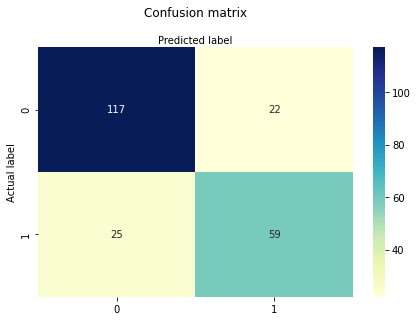

In [177]:
class_names=["not survived","survived"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [178]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7892376681614349
Precision: 0.7283950617283951
Recall: 0.7023809523809523


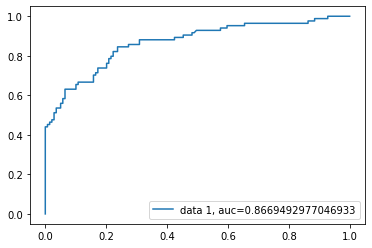

In [180]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Predict the test_data

In [181]:
X_validation = test_data[feature_cols]
X_validation.Embarked = X_validation.Embarked.astype("category").cat.codes
X_validation.Sex = X_validation.Sex.astype("category").cat.codes
X_validation = X_validation.fillna(X_test.mean())

In [182]:
result_pred=logreg.predict(X_validation)

In [183]:
print(result_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [171]:
PassengerId = test_data["PassengerId"]
Result = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': result_pred })
Result.to_csv("result.csv", index=False)